In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from utils import networks, util
import copy
from keras import backend as K 
'''
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
'''

Using TensorFlow backend.


2.2.4


'\nimport tensorflow as tf\nconfig = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\nsess = tf.Session(config=config)\n'

In [2]:
data_train = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')
# Read our image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_tr28, X_val28, X_te28, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test)

In [3]:
batch_size = 256
epochs = 50
num_classes = 10

X_train_flat, X_val_flat, X_test_flat = util.flatten_data(X_tr28, X_val28, X_te28)

# MULTILAYER PERCEPTRON

In [4]:
model = networks.mlp()
history = model.fit(X_train_flat, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val_flat, y_val))

util.save_everything(model,'mlp_50ep', history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.6644 

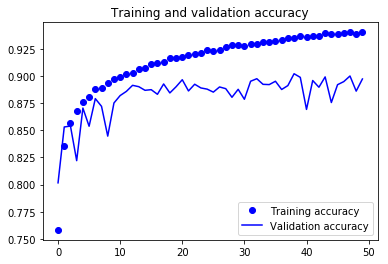

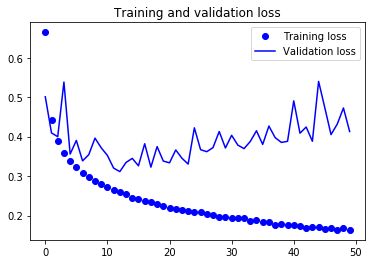

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN

In [6]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'simple_cnn_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 99us/step - loss: 0.5024 - acc: 0.8228 - val_loss: 0.3406 - val_acc: 0.8777
Epoch 2/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.2964 - acc: 0.8931 - val_loss: 0.2950 - val_acc: 0.8908
Epoch 3/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.2468 - acc: 0.9111 - val_loss: 0.2798 - val_acc: 0.8980
Epoch 4/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.2110 - acc: 0.9220 - val_loss: 0.2423 - val_acc: 0.9102
Epoch 5/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.1808 - acc: 0.9336 - val_loss: 0.2548 - val_acc: 0.9079
Epoch 6/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.1496 - acc: 0.9453 - val_loss: 0.2398 - val_acc: 0.9143
Epoch 7/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.1293 - acc: 0.9519 - val_loss: 0.2759 - val_acc

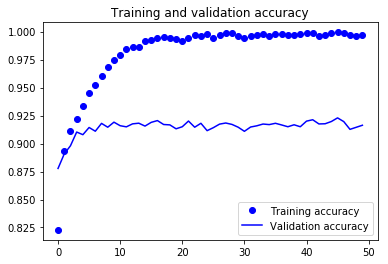

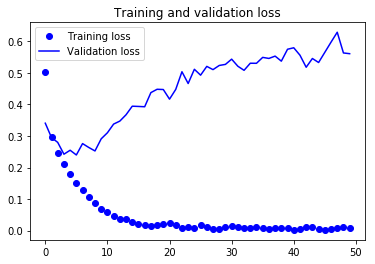

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN Dropout

In [8]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_dropout(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'simple_cnn_dropout_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 78us/step - loss: 0.5550 - acc: 0.8026 - val_loss: 0.3501 - val_acc: 0.8712
Epoch 2/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.3291 - acc: 0.8810 - val_loss: 0.2999 - val_acc: 0.8873
Epoch 3/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.2728 - acc: 0.8994 - val_loss: 0.2736 - val_acc: 0.8971
Epoch 4/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.2370 - acc: 0.9134 - val_loss: 0.2713 - val_acc: 0.8978
Epoch 5/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.2102 - acc: 0.9225 - val_loss: 0.2597 - val_acc: 0.9058
Epoch 6/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.1828 - acc: 0.9325 - val_loss: 0.2483 - val_acc: 0.9100
Epoch 7/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.1620 - acc: 0.9396 - val_loss: 0.2558 - val_acc

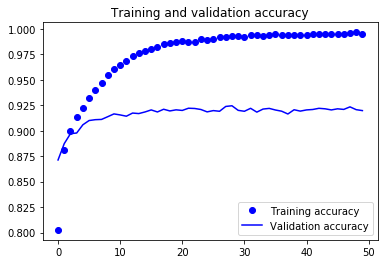

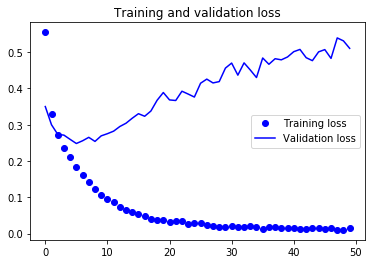

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN BatchNorm

In [10]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_batchnorm(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'simple_cnn_bn_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 113us/step - loss: 0.4239 - acc: 0.8493 - val_loss: 0.3435 - val_acc: 0.8761
Epoch 2/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.2518 - acc: 0.9085 - val_loss: 0.2777 - val_acc: 0.9002
Epoch 3/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.1986 - acc: 0.9287 - val_loss: 0.2389 - val_acc: 0.9103
Epoch 4/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.1571 - acc: 0.9428 - val_loss: 0.2767 - val_acc: 0.9070
Epoch 5/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.1262 - acc: 0.9544 - val_loss: 0.2528 - val_acc: 0.9180
Epoch 6/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.0967 - acc: 0.9651 - val_loss: 0.2723 - val_acc: 0.9166
Epoch 7/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.0797 - acc: 0.9711 - val_loss: 0.2845 - 

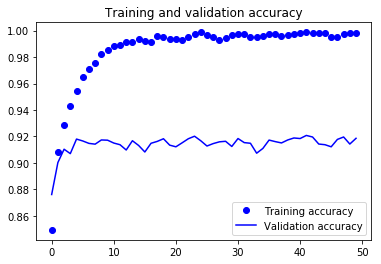

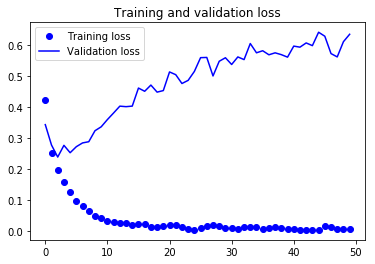

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN BatchNorm Dropout

In [12]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_batchnorm_Dropout(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'simple_cnn_bn_do_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 116us/step - loss: 0.5039 - acc: 0.8263 - val_loss: 0.3056 - val_acc: 0.8868
Epoch 2/50
48000/48000 [==============================] - 5s 103us/step - loss: 0.2819 - acc: 0.8979 - val_loss: 0.2690 - val_acc: 0.8986
Epoch 3/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.2339 - acc: 0.9125 - val_loss: 0.2500 - val_acc: 0.9081
Epoch 4/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.1998 - acc: 0.9275 - val_loss: 0.2470 - val_acc: 0.9076
Epoch 5/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.1675 - acc: 0.9381 - val_loss: 0.2541 - val_acc: 0.9056
Epoch 6/50
48000/48000 [==============================] - 5s 103us/step - loss: 0.1458 - acc: 0.9460 - val_loss: 0.2368 - val_acc: 0.9158
Epoch 7/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.1254 - acc: 0.9535 - val_loss: 0.2495 - 

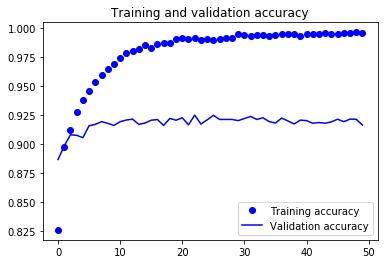

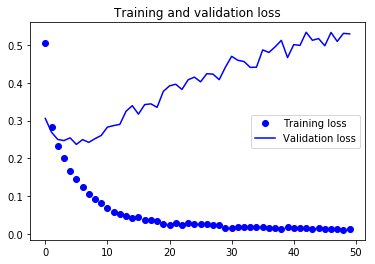

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# AlexNet

In [14]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.alexnet_model(img_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=4,
          epochs=20,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'alexnet_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1097s 23ms/step - loss: 1.0766 - acc: 0.6629 - val_loss: 0.5216 - val_acc: 0.8502
Epoch 2/20
48000/48000 [==============================] - 1092s 23ms/step - loss: 0.7566 - acc: 0.7705 - val_loss: 0.4445 - val_acc: 0.8696
Epoch 3/20
48000/48000 [==============================] - 1092s 23ms/step - loss: 0.6405 - acc: 0.8128 - val_loss: 0.4756 - val_acc: 0.8749
Epoch 4/20
48000/48000 [==============================] - 1092s 23ms/step - loss: 0.5827 - acc: 0.8310 - val_loss: 0.4025 - val_acc: 0.8873
Epoch 5/20
48000/48000 [==============================] - 1092s 23ms/step - loss: 0.5458 - acc: 0.8440 - val_loss: 0.3522 - val_acc: 0.8982
Epoch 6/20
48000/48000 [==============================] - 1092s 23ms/step - loss: 0.4962 - acc: 0.8544 - val_loss: 0.4467 - val_acc: 0.8711
Epoch 7/20
48000/48000 [==============================] - 1092s 23ms/step - loss: 0.4683 - acc: 0.8629 - val_l

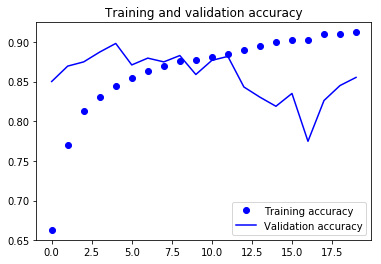

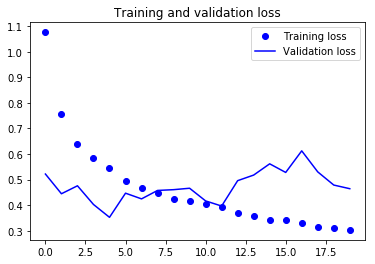

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# mobilenetV2

In [16]:
K.clear_session()
del model

x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.mobilenetV2(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'mobilenetv2_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 23s 480us/step - loss: 0.6908 - acc: 0.7439 - val_loss: 0.6484 - val_acc: 0.8190
Epoch 2/50
48000/48000 [==============================] - 15s 311us/step - loss: 0.3604 - acc: 0.8680 - val_loss: 1.1067 - val_acc: 0.8028
Epoch 3/50
48000/48000 [==============================] - 15s 310us/step - loss: 0.2850 - acc: 0.8948 - val_loss: 1.2562 - val_acc: 0.7966
Epoch 4/50
48000/48000 [==============================] - 15s 310us/step - loss: 0.2506 - acc: 0.9082 - val_loss: 1.0782 - val_acc: 0.8431
Epoch 5/50
48000/48000 [==============================] - 15s 310us/step - loss: 0.2223 - acc: 0.9184 - val_loss: 1.4976 - val_acc: 0.7840
Epoch 6/50
48000/48000 [==============================] - 15s 310us/step - loss: 0.2020 - acc: 0.9257 - val_loss: 0.9816 - val_acc: 0.8516
Epoch 7/50
48000/48000 [==============================] - 15s 312us/step - loss: 0.1887 - acc: 0.9303 - val_loss: 2.

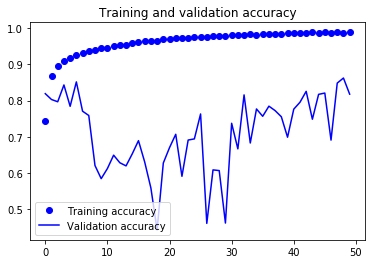

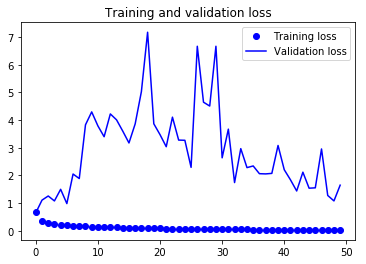

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# nasnet

In [18]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.nasnet(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'nasnet_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.5885 - acc: 0.7874 - val_loss: 1.4431 - val_acc: 0.6724
Epoch 2/50
48000/48000 [==============================] - 38s 798us/step - loss: 0.3608 - acc: 0.8695 - val_loss: 1.0366 - val_acc: 0.7425
Epoch 3/50
48000/48000 [==============================] - 38s 798us/step - loss: 0.2986 - acc: 0.8901 - val_loss: 1.5330 - val_acc: 0.6886
Epoch 4/50
48000/48000 [==============================] - 39s 803us/step - loss: 0.2590 - acc: 0.9049 - val_loss: 2.3263 - val_acc: 0.6673
Epoch 5/50
48000/48000 [==============================] - 38s 802us/step - loss: 0.2335 - acc: 0.9136 - val_loss: 2.8645 - val_acc: 0.5942
Epoch 6/50
48000/48000 [==============================] - 38s 801us/step - loss: 0.2116 - acc: 0.9211 - val_loss: 1.5974 - val_acc: 0.7198
Epoch 7/50
48000/48000 [==============================] - 39s 803us/step - loss: 0.1900 - acc: 0.9306 - val_loss: 2.48

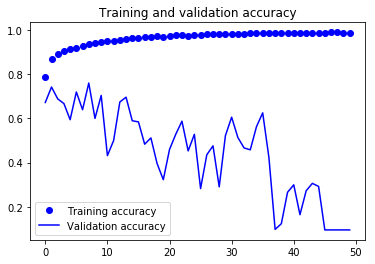

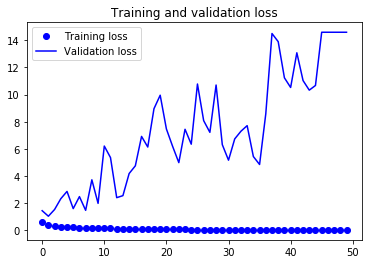

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Inception

In [20]:
K.clear_session()
del model


# InceptionV3 needs at least 75,75 input
_, _, _, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test,75,75)
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)
model = networks.inceptionV3(input_shape=(75,75,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'inception_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 45s 937us/step - loss: 0.6029 - acc: 0.7794 - val_loss: 0.4854 - val_acc: 0.8208
Epoch 2/50
48000/48000 [==============================] - 27s 564us/step - loss: 0.3440 - acc: 0.8732 - val_loss: 0.4378 - val_acc: 0.8521
Epoch 3/50
48000/48000 [==============================] - 27s 564us/step - loss: 0.2752 - acc: 0.9001 - val_loss: 0.4050 - val_acc: 0.8675
Epoch 4/50
48000/48000 [==============================] - 27s 566us/step - loss: 0.2374 - acc: 0.9143 - val_loss: 0.3722 - val_acc: 0.8758
Epoch 5/50
48000/48000 [==============================] - 27s 567us/step - loss: 0.2086 - acc: 0.9246 - val_loss: 0.2826 - val_acc: 0.9002
Epoch 6/50
48000/48000 [==============================] - 27s 567us/step - loss: 0.1895 - acc: 0.9313 - val_loss: 0.2793 - val_acc: 0.9009
Epoch 7/50
48000/48000 [==============================] - 27s 567us/step - loss: 0.1776 - acc: 0.9345 - val_loss: 0.

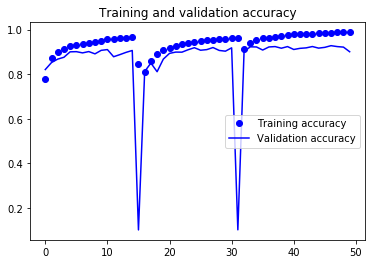

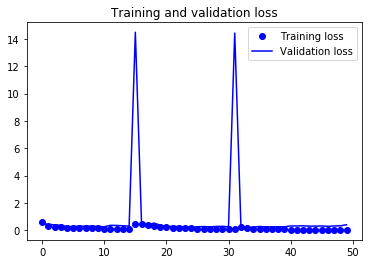

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Resnet

In [22]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.resnet50(input_shape=(75,75,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))

util.save_everything(model,'resnet_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 66s 1ms/step - loss: 0.5777 - acc: 0.8061 - val_loss: 1.1776 - val_acc: 0.6903
Epoch 2/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2818 - acc: 0.8987 - val_loss: 8.7578 - val_acc: 0.3802
Epoch 3/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2609 - acc: 0.9081 - val_loss: 14.4942 - val_acc: 0.1007
Epoch 4/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2646 - acc: 0.9043 - val_loss: 0.3274 - val_acc: 0.8847
Epoch 5/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1869 - acc: 0.9318 - val_loss: 0.2894 - val_acc: 0.9043
Epoch 6/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1527 - acc: 0.9444 - val_loss: 0.2651 - val_acc: 0.9083
Epoch 7/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1248 - acc: 0.9541 - val_loss: 0.2769 - val_ac

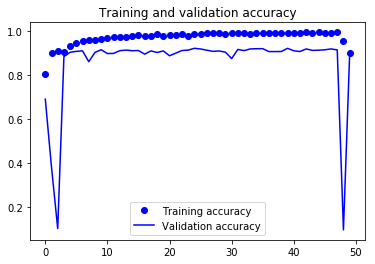

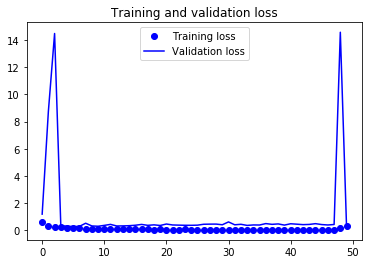

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()